	Features
## 1	X_Minimum
## 2	X_Maximum
## 3	Y_Minimum
## 4	Y_Maximum
## 5	Pixels_Areas
## 6	X_Perimeter
## 7	Y_Perimeter
## 8	Sum_of_Lumisity
## 9	Maximum_of_Lumisity
## 10	Length_of_Conveyer
## 11	TypeOfSteel_A300
## 12	TypeOfSteel_A400
## 13	Steel_Plate_Thickness
## 14	Edges_Index
## 15	Empty_Index
## 16	Square_Index
## 17	Outside_X_Index
## 18	Edges_X_Index
## 19	Edges_Y_Index
## 20	Outside_Global_Index
## 21	LogOfAreas
## 22	Log_X_Index
## 23	Log_Y_Index
## 24	Orientation_Index
## 25	Lumisity_Index
## 26	SigmoidOfAreas
## 27	Minimum_of_Luminosity
## 28	Pastry
## 29	Z_Scratch
## 30	K_Scratch
## 31	Stains
## 32	Dirtiness
## 33	Bumps
## 34	Other_Faults


In [1]:
!wget https://archive.ics.uci.edu/static/public/198/steel+plates+faults.zip

--2024-08-10 17:34:55--  https://archive.ics.uci.edu/static/public/198/steel+plates+faults.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘steel+plates+faults.zip’

steel+plates+faults     [  <=>               ]  98.53K   218KB/s    in 0.5s    

2024-08-10 17:34:56 (218 KB/s) - ‘steel+plates+faults.zip’ saved [100890]



In [2]:
!unzip -q steel+plates+faults.zip

In [3]:
import pandas as pd
data = pd.read_table('Faults.NNA', header = None, sep='\t')

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [5]:
data.iloc[:,27:].describe()

,27,28,29,30,31,32,33
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# data['Target'] = data.apply(lambda x:
#                             "A" if x[27] == 1 else
#                             ("B" if x[28] == 1 else
#                              ("C" if x[29] == 1 else
#                               ("D" if x[30] == 1 else
#                                ("E" if x[31] == 1 else
#                                 ("F" if x[32] == 1 else
#                                 "G"))))), axis=1)


we can use 1000000 * [A,B,C,D,E,F,G] OR ARGMAX

In [7]:
# import numpy as np
# data.iloc[:,27:].apply(lambda x: np.argmax(x), axis=1)

In [8]:
pd.from_dummies(data.iloc[:,27:])

,
0,27
1,27
2,27
3,27
4,27
...,...
1936,33
1937,33
1938,33
1939,33


In [9]:
data['Target'] = pd.from_dummies(data.iloc[:,27:])-27

In [10]:
data['Target'].sample(6)

,Target
687,2
571,2
1563,6
749,3
902,5
60,0


In [11]:
data.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,       10,       11,       12,       13,
             14,       15,       16,       17,       18,       19,       20,
             21,       22,       23,       24,       25,       26,       27,
             28,       29,       30,       31,       32,       33, 'Target'],
      dtype='object')

In [12]:
# np.argmax([-3,0,1,3,2,1,-1,-2])

In [13]:
data.drop(columns=[27,28,29,30,31,32,33], axis=1, inplace=True)

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,Target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0


In [15]:
data['Target'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [16]:
data.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,       10,       11,       12,       13,
             14,       15,       16,       17,       18,       19,       20,
             21,       22,       23,       24,       25,       26, 'Target'],
      dtype='object')

In [17]:
data.columns= ["X_Minimum",
"X_Maximum",
"Y_Minimum",
"Y_Maximum",
"Pixels_Areas",
"X_Perimeter",
"Y_Perimeter",
"Sum_of_Lumisity",
"Maximum_of_Lumisity",
"Length_of_Conveyer",
"TypeOfSteel_A300",
"TypeOfSteel_A400",
"Steel_Plate_Thickness",
"Edges_Index",
"Empty_Index",
"Square_Index",
"Outside_X_Index",
"Edges_X_Index",
"Edges_Y_Index",
"Outside_Global_Index",
"LogOfAreas",
"Log_X_Index",
"Log_Y_Index",
"Orientation_Index",
"Lumisity_Index",
"SigmoidOfAreas", "Minimum_of_Luminosity", "Target"]

In [18]:
data.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Lumisity', 'Maximum_of_Lumisity',
       'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400',
       'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
       'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index',
       'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index',
       'Orientation_Index', 'Lumisity_Index', 'SigmoidOfAreas',
       'Minimum_of_Luminosity', 'Target'],
      dtype='object')

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [20]:
for i in data.columns:
  fig = px.histogram(data_frame=data, x=i, nbins=50, title=f"Histogram of {i}")
  fig.show()

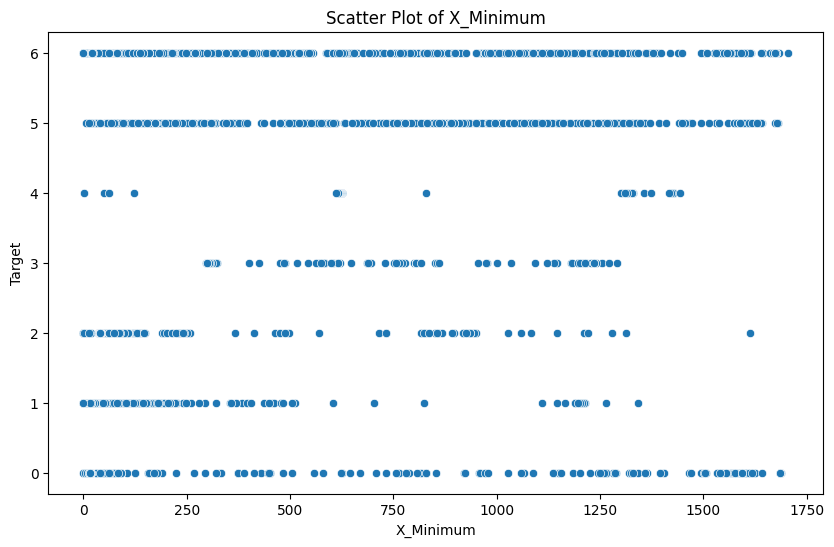

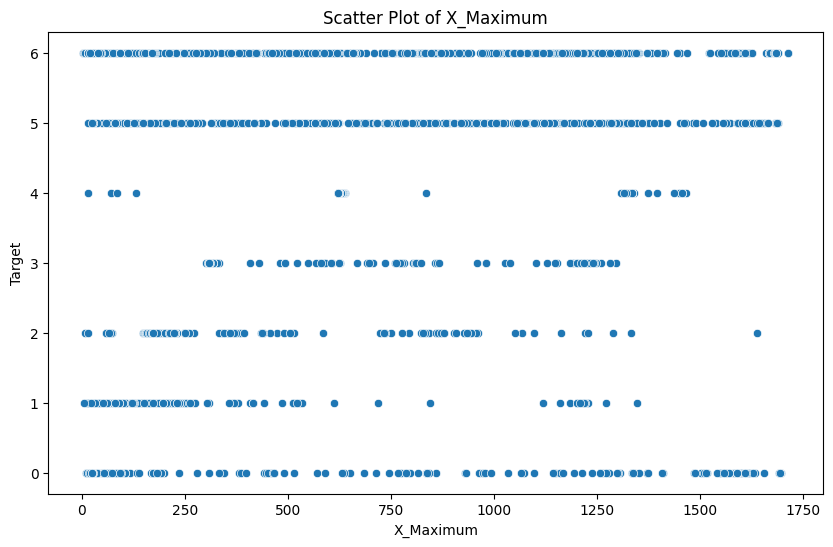

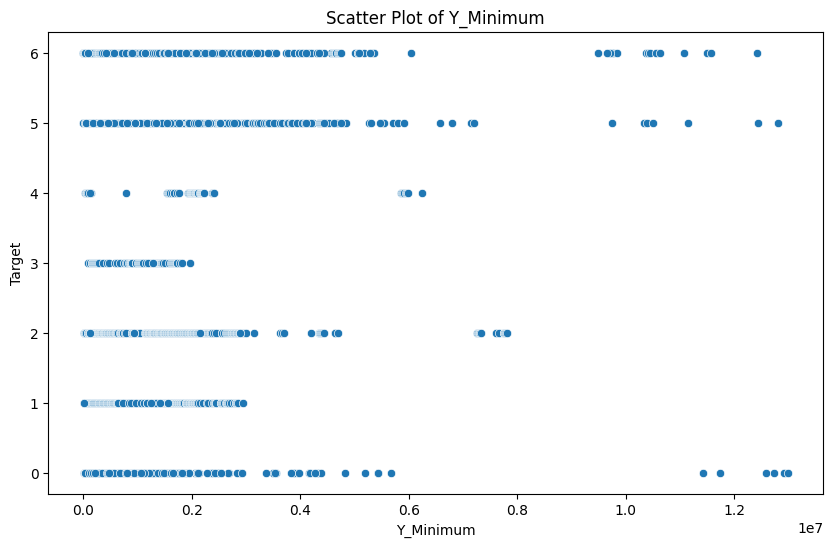

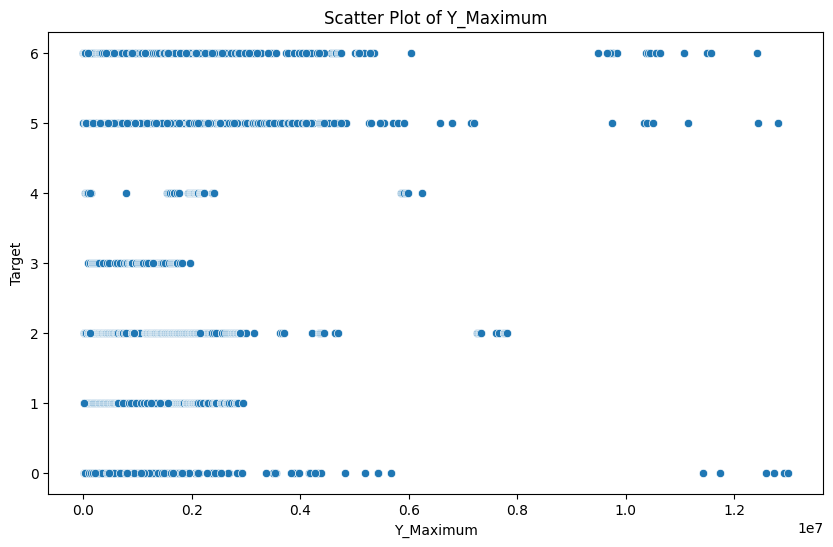

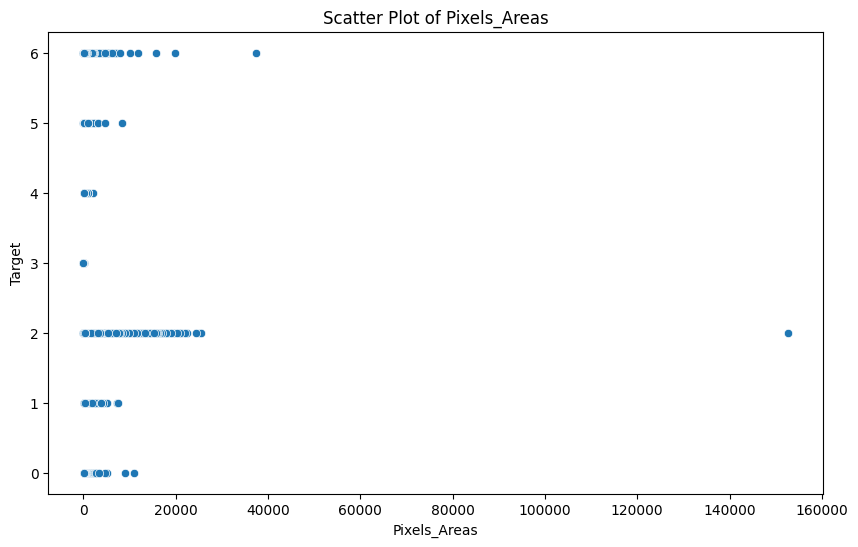

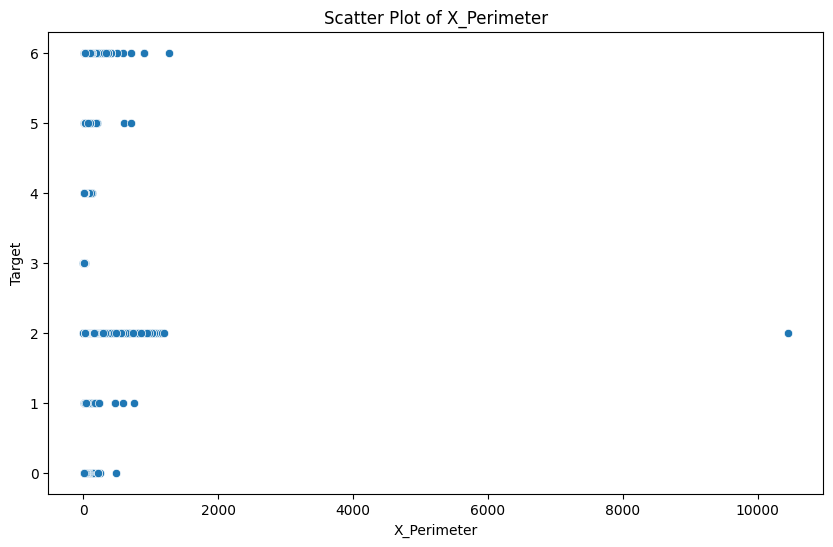

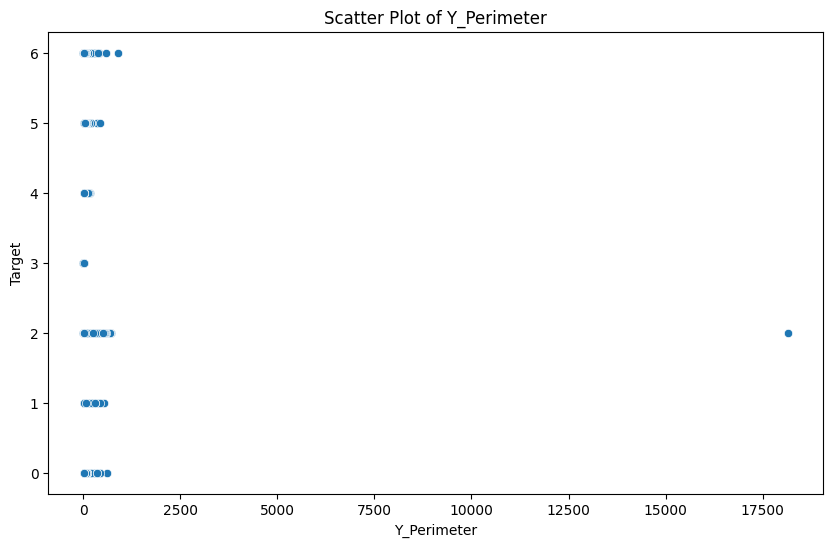

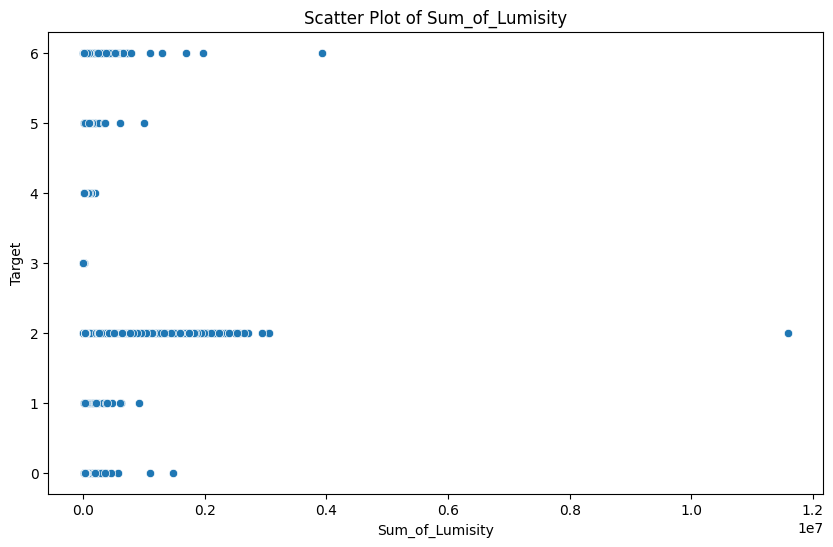

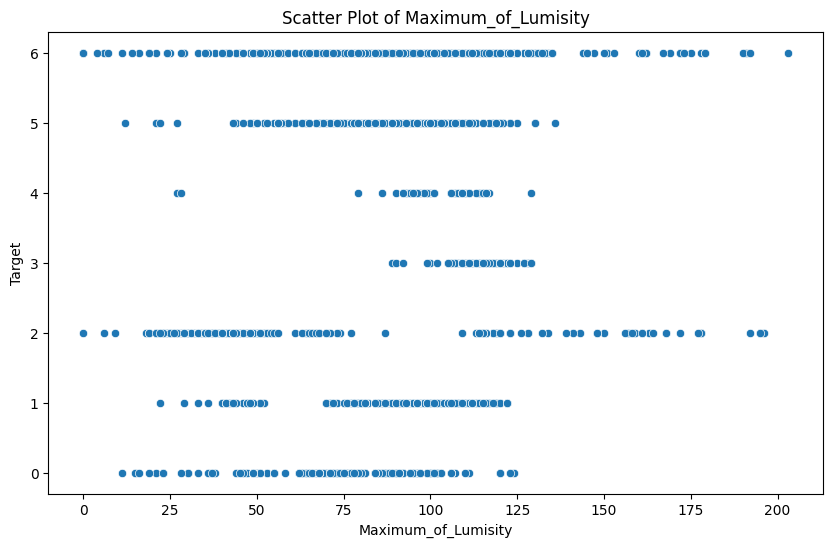

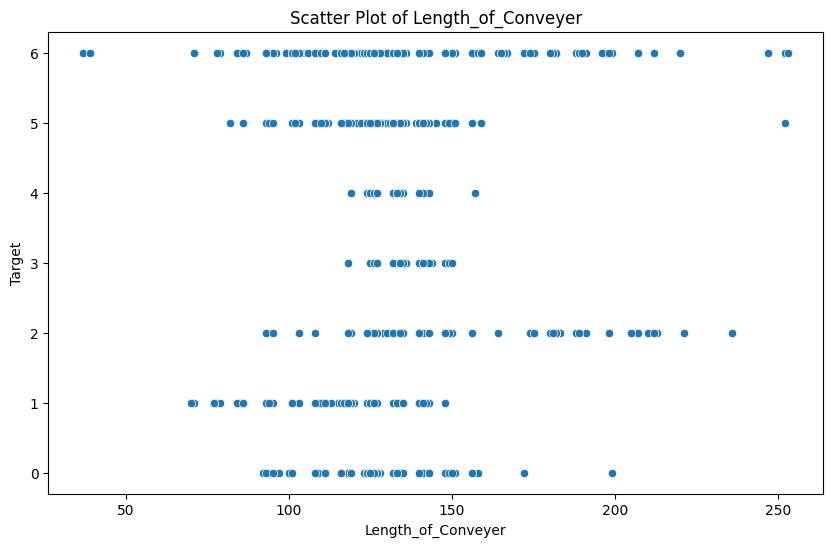

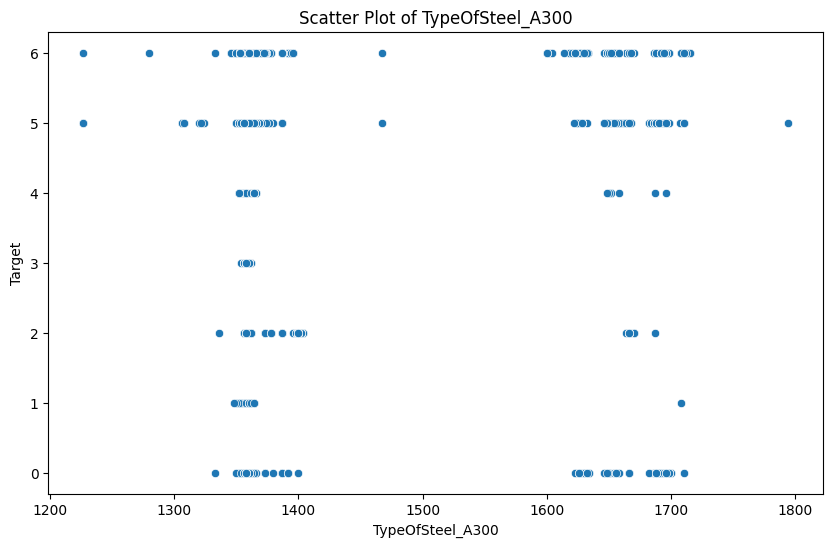

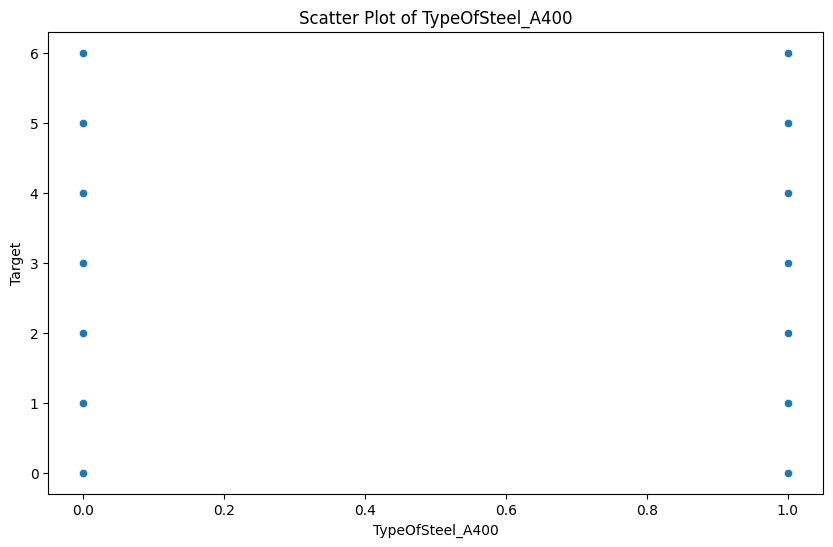

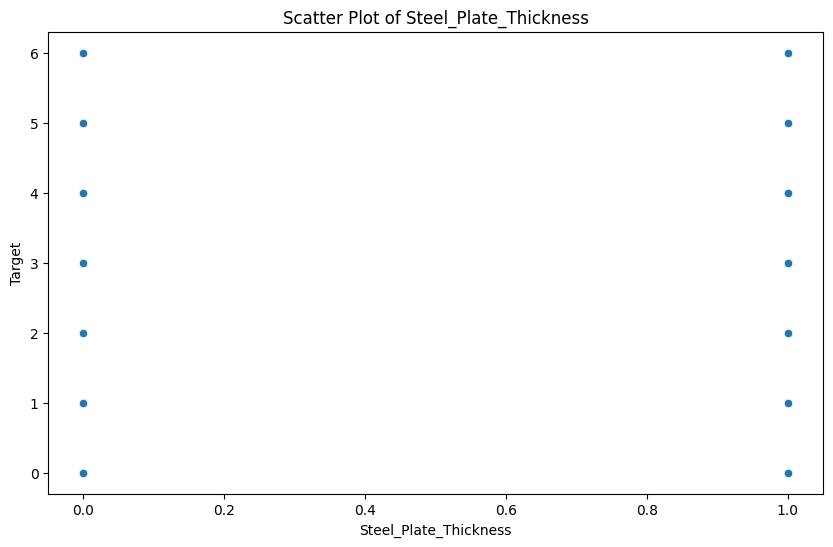

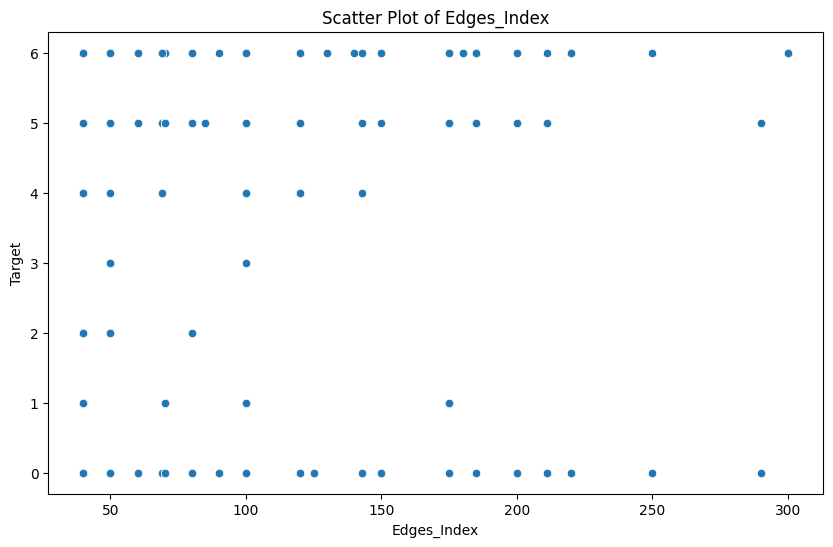

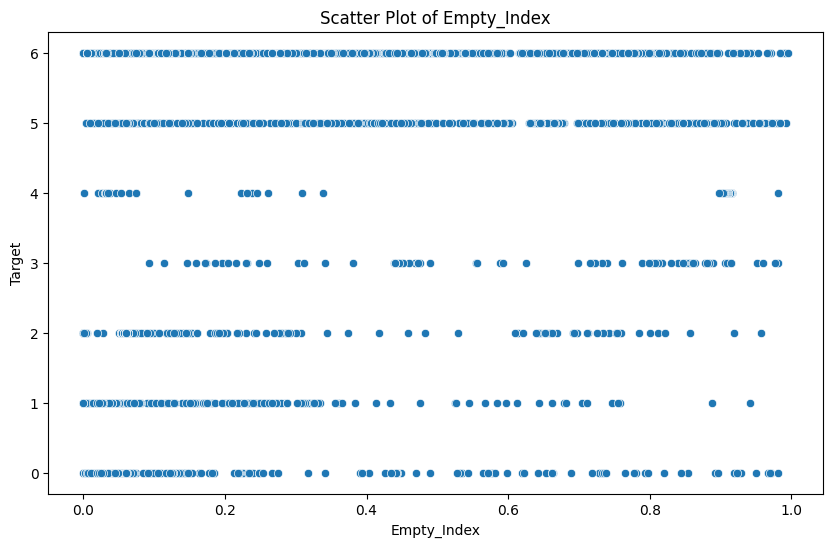

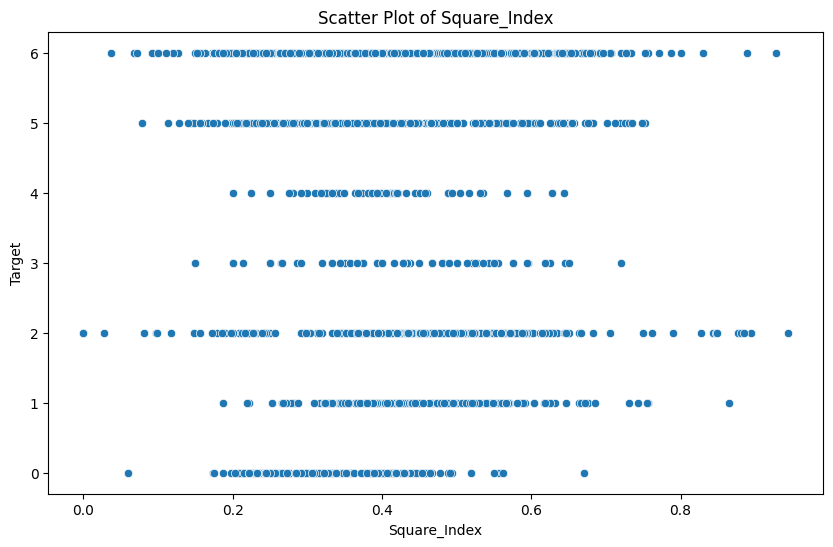

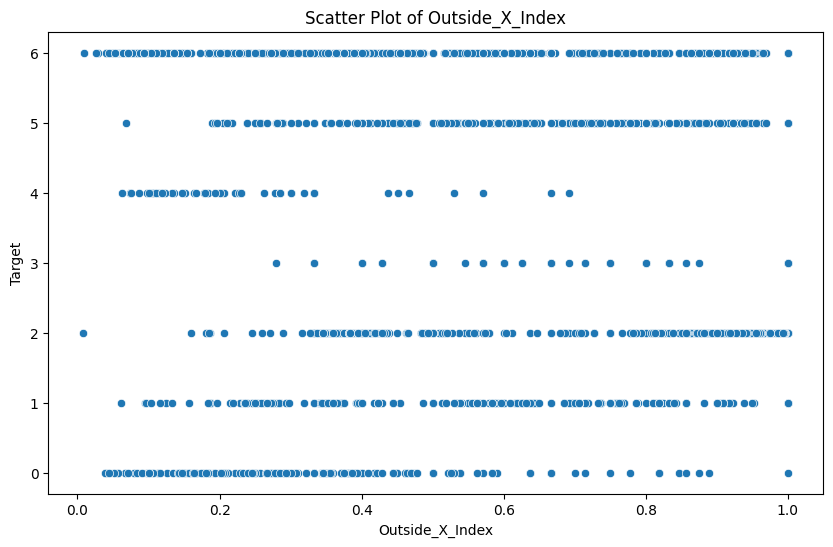

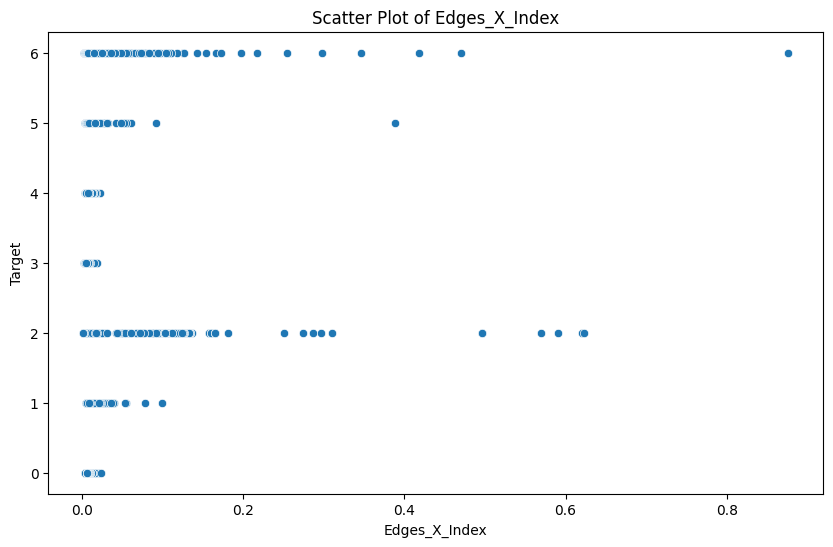

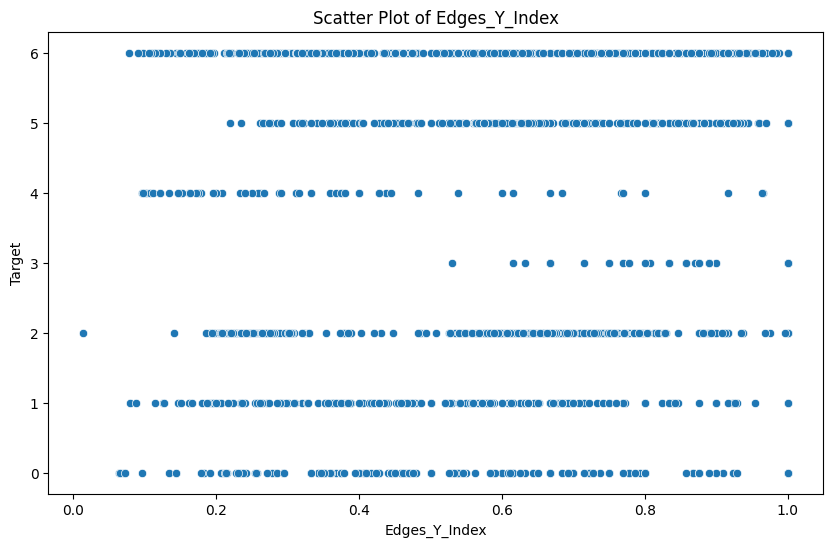

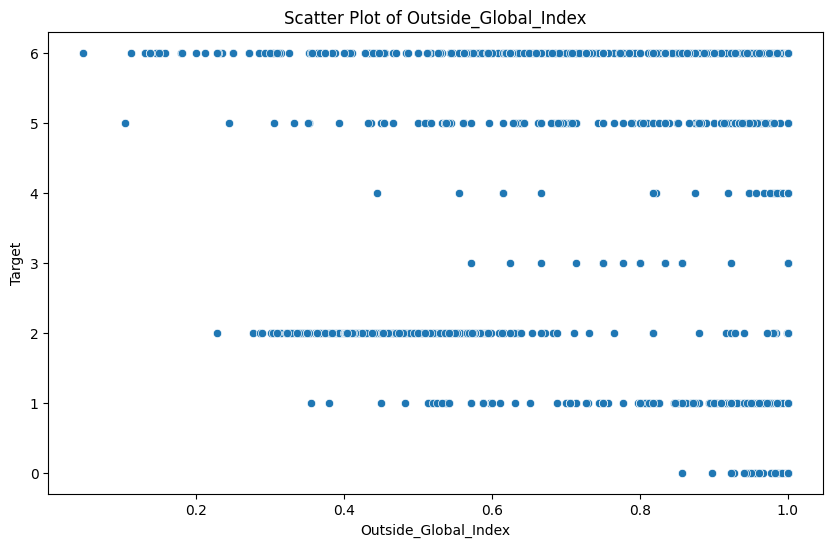

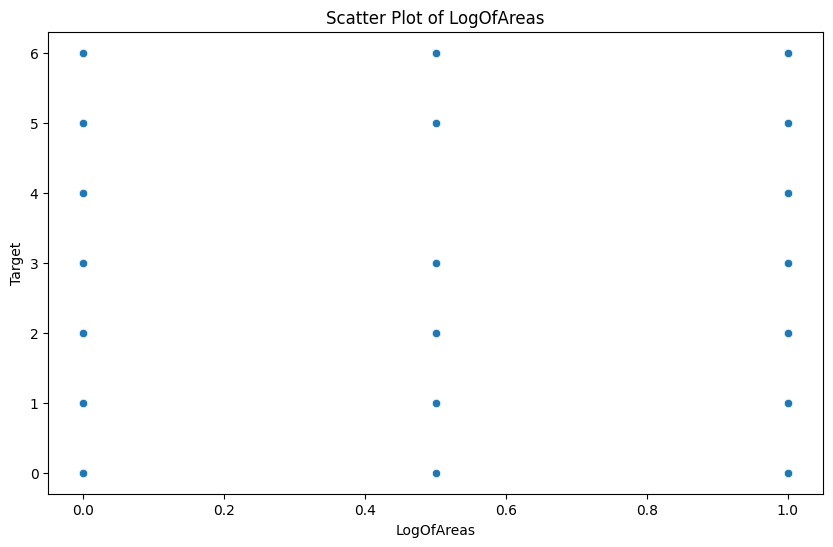

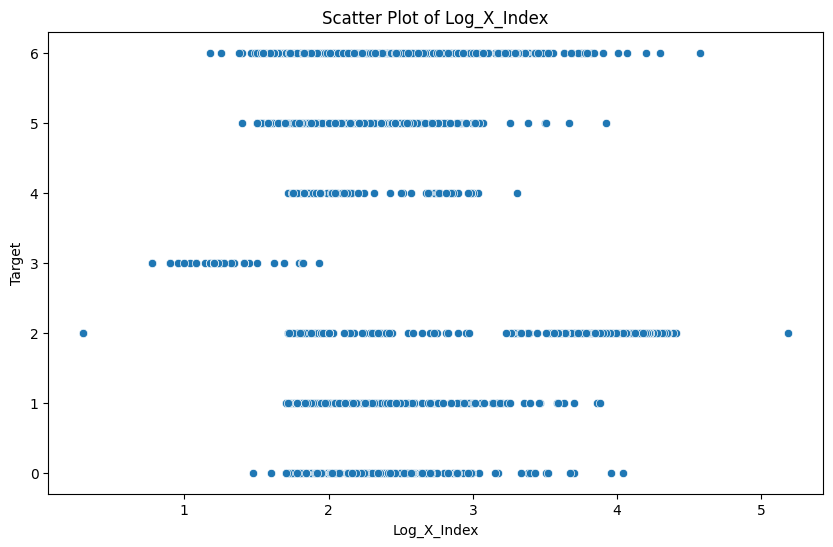

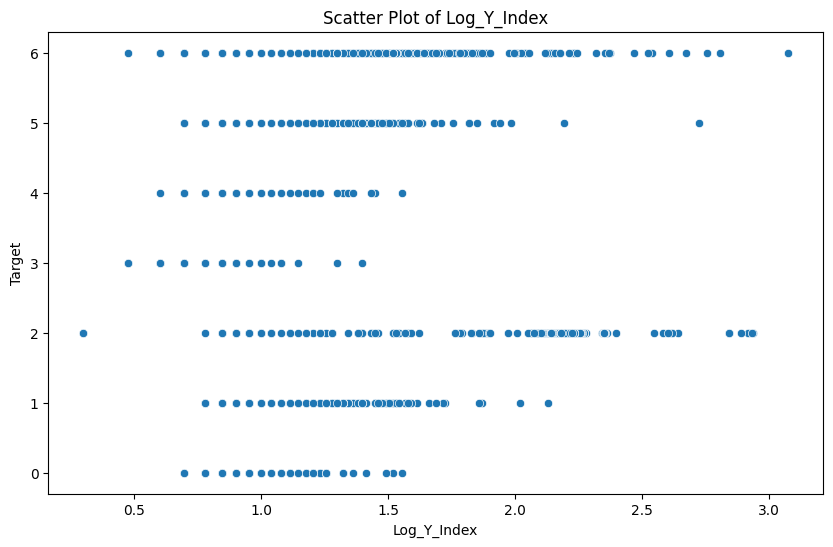

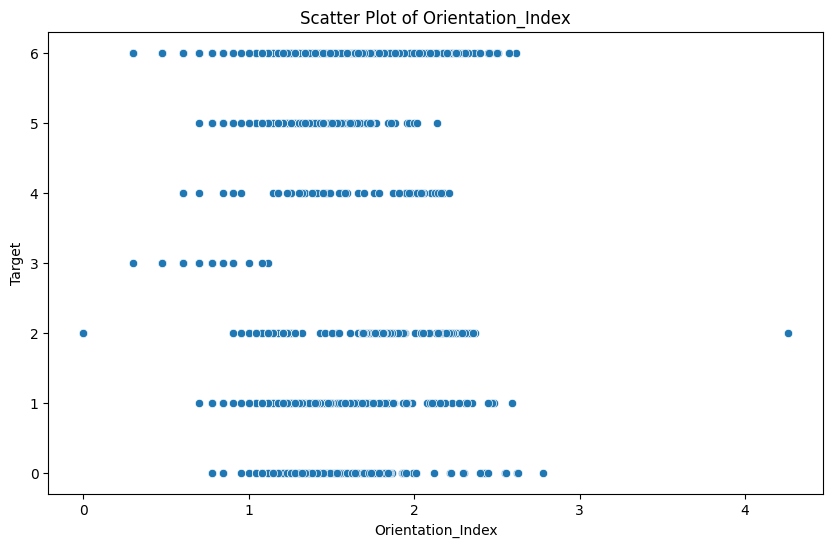

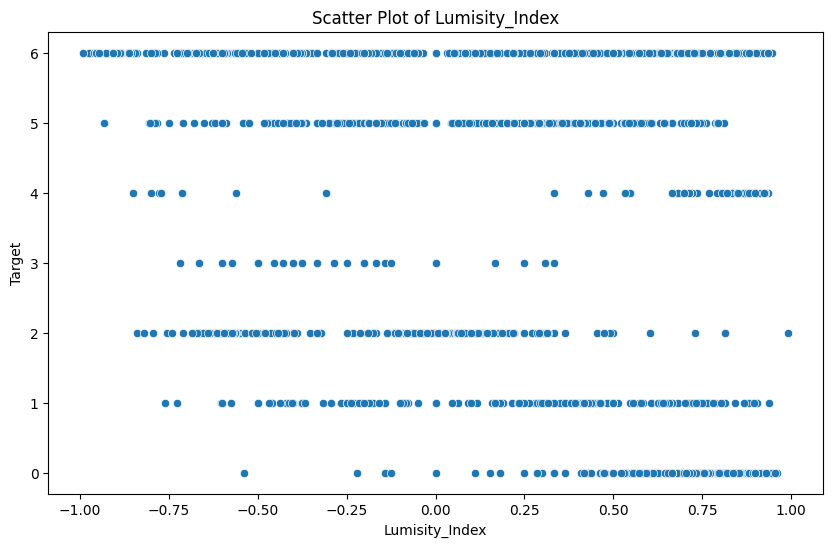

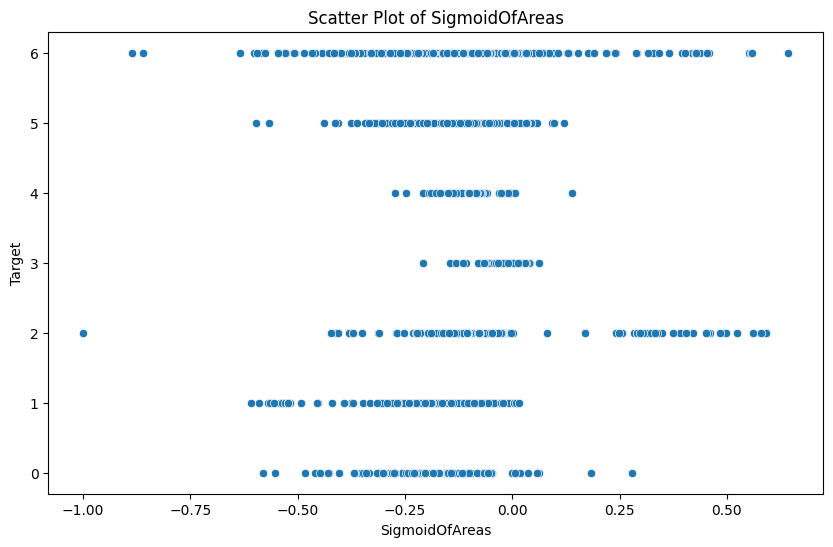

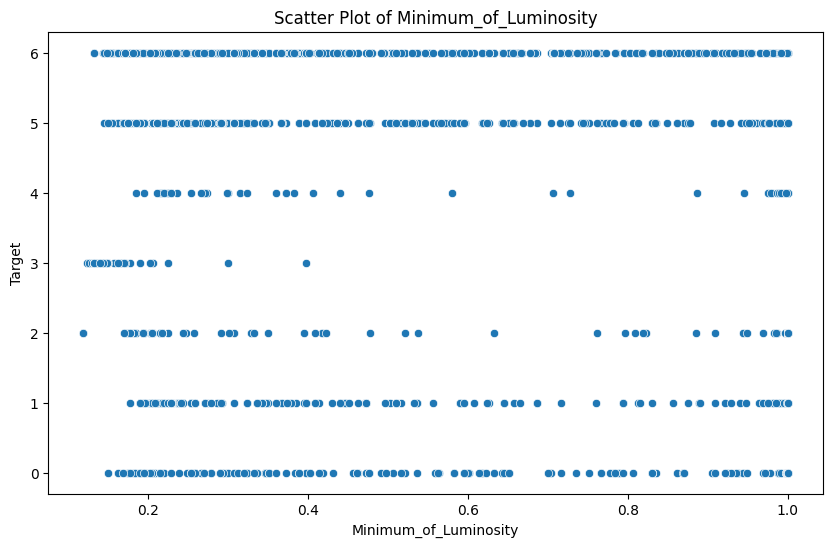

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each column in the DataFrame
for i in data.columns:
    if i != 'Target':  # Skip the 'Target' column itself
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=i, y='Target')
        plt.title(f"Scatter Plot of {i}")
        plt.xlabel(i)
        plt.ylabel('Target')
        plt.show()


In [22]:
data[data['Pixels_Areas']>140000]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Lumisity,Maximum_of_Lumisity,Length_of_Conveyer,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Lumisity_Index,SigmoidOfAreas,Minimum_of_Luminosity,Target
391,19,169,4197607,4215748,152655,10449,18152,11591414,0,156,...,0.0144,0.9994,1.0,5.1837,2.1761,4.2587,0.9917,-0.4068,1.0,2


In [23]:
data[data['X_Perimeter']>8000]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Lumisity,Maximum_of_Lumisity,Length_of_Conveyer,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Lumisity_Index,SigmoidOfAreas,Minimum_of_Luminosity,Target
391,19,169,4197607,4215748,152655,10449,18152,11591414,0,156,...,0.0144,0.9994,1.0,5.1837,2.1761,4.2587,0.9917,-0.4068,1.0,2


In [24]:
data[data['Y_Perimeter']>15000]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Lumisity,Maximum_of_Lumisity,Length_of_Conveyer,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Lumisity_Index,SigmoidOfAreas,Minimum_of_Luminosity,Target
391,19,169,4197607,4215748,152655,10449,18152,11591414,0,156,...,0.0144,0.9994,1.0,5.1837,2.1761,4.2587,0.9917,-0.4068,1.0,2


In [25]:
data[data['Sum_of_Lumisity']> 1e7]


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Lumisity,Maximum_of_Lumisity,Length_of_Conveyer,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Lumisity_Index,SigmoidOfAreas,Minimum_of_Luminosity,Target
391,19,169,4197607,4215748,152655,10449,18152,11591414,0,156,...,0.0144,0.9994,1.0,5.1837,2.1761,4.2587,0.9917,-0.4068,1.0,2


In [26]:
data[data['Orientation_Index']>4]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Lumisity,Maximum_of_Lumisity,Length_of_Conveyer,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Lumisity_Index,SigmoidOfAreas,Minimum_of_Luminosity,Target
391,19,169,4197607,4215748,152655,10449,18152,11591414,0,156,...,0.0144,0.9994,1.0,5.1837,2.1761,4.2587,0.9917,-0.4068,1.0,2


In [27]:
data.drop(index=391, inplace=True)

In [28]:
data.reset_index(inplace=True)

In [29]:
data.drop(columns=['index'], inplace=True)

In [30]:
data.isnull().sum()

,0
X_Minimum,0
X_Maximum,0
Y_Minimum,0
Y_Maximum,0
Pixels_Areas,0
X_Perimeter,0
Y_Perimeter,0
Sum_of_Lumisity,0
Maximum_of_Lumisity,0
Length_of_Conveyer,0


# Identifying that distribution of data for Train and Test dataset is approx. identical or not.

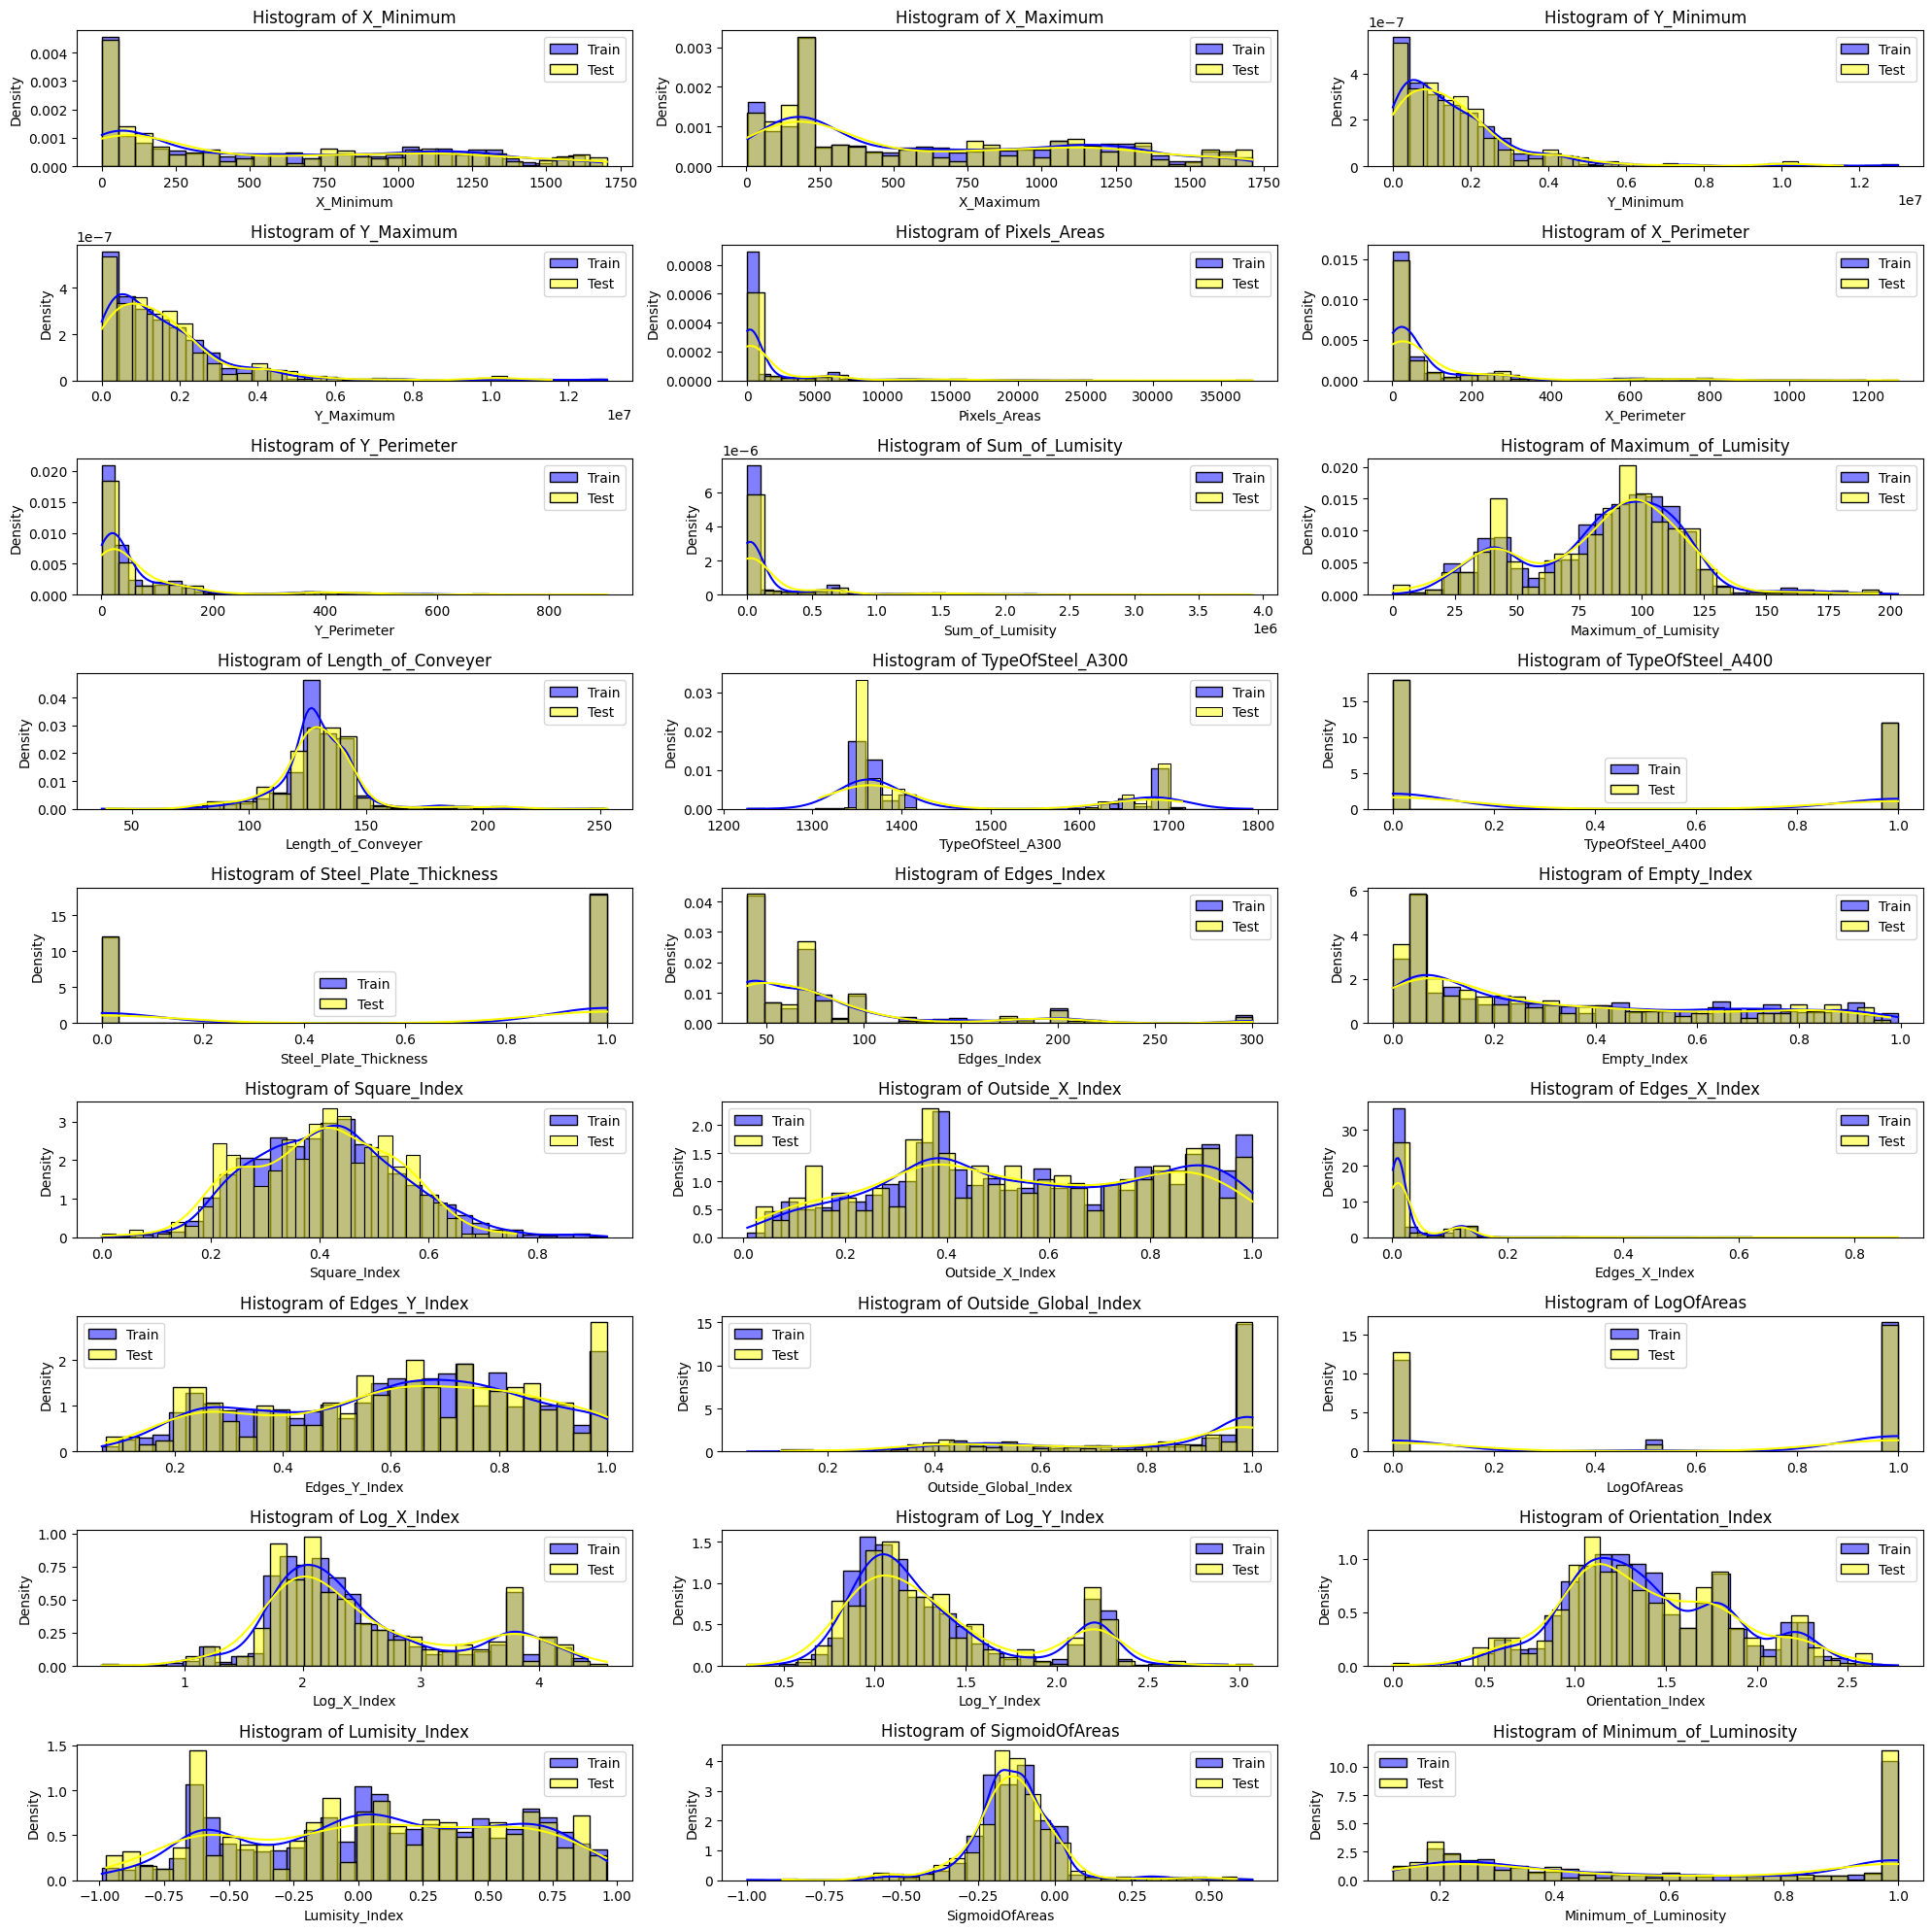

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.figure(figsize=(20, 20))

X = data.drop(columns=['Target'])
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for idx, column in enumerate(X_train.columns):
    plt.subplot(9, 3, idx+1)
    sns.histplot(X_train[column], color="blue", kde=True, stat="density", label='Train', bins=30)
    sns.histplot(X_test[column], color="yellow", kde=True, stat="density", label='Test', bins=30)
    plt.title(f"Histogram of {column}")
    plt.legend()

plt.tight_layout()
plt.show()


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1940 entries, 0 to 1939
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1940 non-null   int64  
 1   X_Maximum              1940 non-null   int64  
 2   Y_Minimum              1940 non-null   int64  
 3   Y_Maximum              1940 non-null   int64  
 4   Pixels_Areas           1940 non-null   int64  
 5   X_Perimeter            1940 non-null   int64  
 6   Y_Perimeter            1940 non-null   int64  
 7   Sum_of_Lumisity        1940 non-null   int64  
 8   Maximum_of_Lumisity    1940 non-null   int64  
 9   Length_of_Conveyer     1940 non-null   int64  
 10  TypeOfSteel_A300       1940 non-null   int64  
 11  TypeOfSteel_A400       1940 non-null   int64  
 12  Steel_Plate_Thickness  1940 non-null   int64  
 13  Edges_Index            1940 non-null   int64  
 14  Empty_Index            1940 non-null   float64
 15  Squa

In [33]:
#data['Target'] = data['Target'].astype('int')

In [34]:
data.select_dtypes(include=['int64','float64']).corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Lumisity,Maximum_of_Lumisity,Length_of_Conveyer,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Lumisity_Index,SigmoidOfAreas,Minimum_of_Luminosity,Target
X_Minimum,1.000000,0.988314,0.042641,0.042632,-0.389060,-0.383422,-0.350872,-0.378765,0.236690,-0.074858,...,0.153721,0.368508,0.147835,-0.428098,-0.437460,-0.326854,0.179782,-0.032629,-0.354823,0.291431
X_Maximum,0.988314,1.000000,0.052854,0.052847,-0.282825,-0.271949,-0.258484,-0.274252,0.167760,-0.061792,...,0.148380,0.272385,0.099703,-0.331648,-0.323522,-0.265843,0.115986,-0.039901,-0.286338,0.269152
Y_Minimum,0.042641,0.052854,1.000000,1.000000,-0.005237,-0.002490,-0.026472,-0.010532,-0.063903,-0.068878,...,0.068040,-0.037156,-0.063609,0.042577,0.069206,-0.013236,-0.087961,-0.089409,0.024375,0.000742
Y_Maximum,0.042632,0.052847,1.000000,1.000000,-0.005214,-0.002466,-0.026443,-0.010509,-0.063920,-0.068876,...,0.068020,-0.037167,-0.063604,0.042602,0.069223,-0.013209,-0.087954,-0.089413,0.024396,0.000733
Pixels_Areas,-0.389060,-0.282825,-0.005237,-0.005214,1.000000,0.959504,0.929943,0.996767,-0.611971,0.119254,...,-0.344683,-0.634858,-0.164073,0.801896,0.770598,0.652498,-0.220294,-0.020830,0.540271,-0.301975
X_Perimeter,-0.383422,-0.271949,-0.002490,-0.002466,0.959504,1.000000,0.952089,0.960622,-0.565771,0.138803,...,-0.399090,-0.680242,-0.151129,0.804662,0.788775,0.664737,-0.213778,0.000255,0.573168,-0.279977
Y_Perimeter,-0.350872,-0.258484,-0.026472,-0.026443,0.929943,0.952089,1.000000,0.932100,-0.574470,0.116166,...,-0.520499,-0.565447,-0.021217,0.807914,0.699083,0.767673,-0.030292,-0.026864,0.606035,-0.284334
Sum_of_Lumisity,-0.378765,-0.274252,-0.010532,-0.010509,0.996767,0.960622,0.932100,1.000000,-0.592291,0.139871,...,-0.347630,-0.624268,-0.151972,0.781953,0.750894,0.639893,-0.207834,0.008299,0.521748,-0.295573
Maximum_of_Lumisity,0.236690,0.167760,-0.063903,-0.063920,-0.611971,-0.565771,-0.574470,-0.592291,1.000000,0.432463,...,0.249763,0.318307,0.036728,-0.677375,-0.566744,-0.586724,0.059741,0.668807,-0.514256,0.289279
Length_of_Conveyer,-0.074858,-0.061792,-0.068878,-0.068876,0.119254,0.138803,0.116166,0.139871,0.432463,1.000000,...,0.095462,-0.168116,-0.124751,0.005261,0.091697,-0.074800,-0.171268,0.872680,-0.040556,0.019399


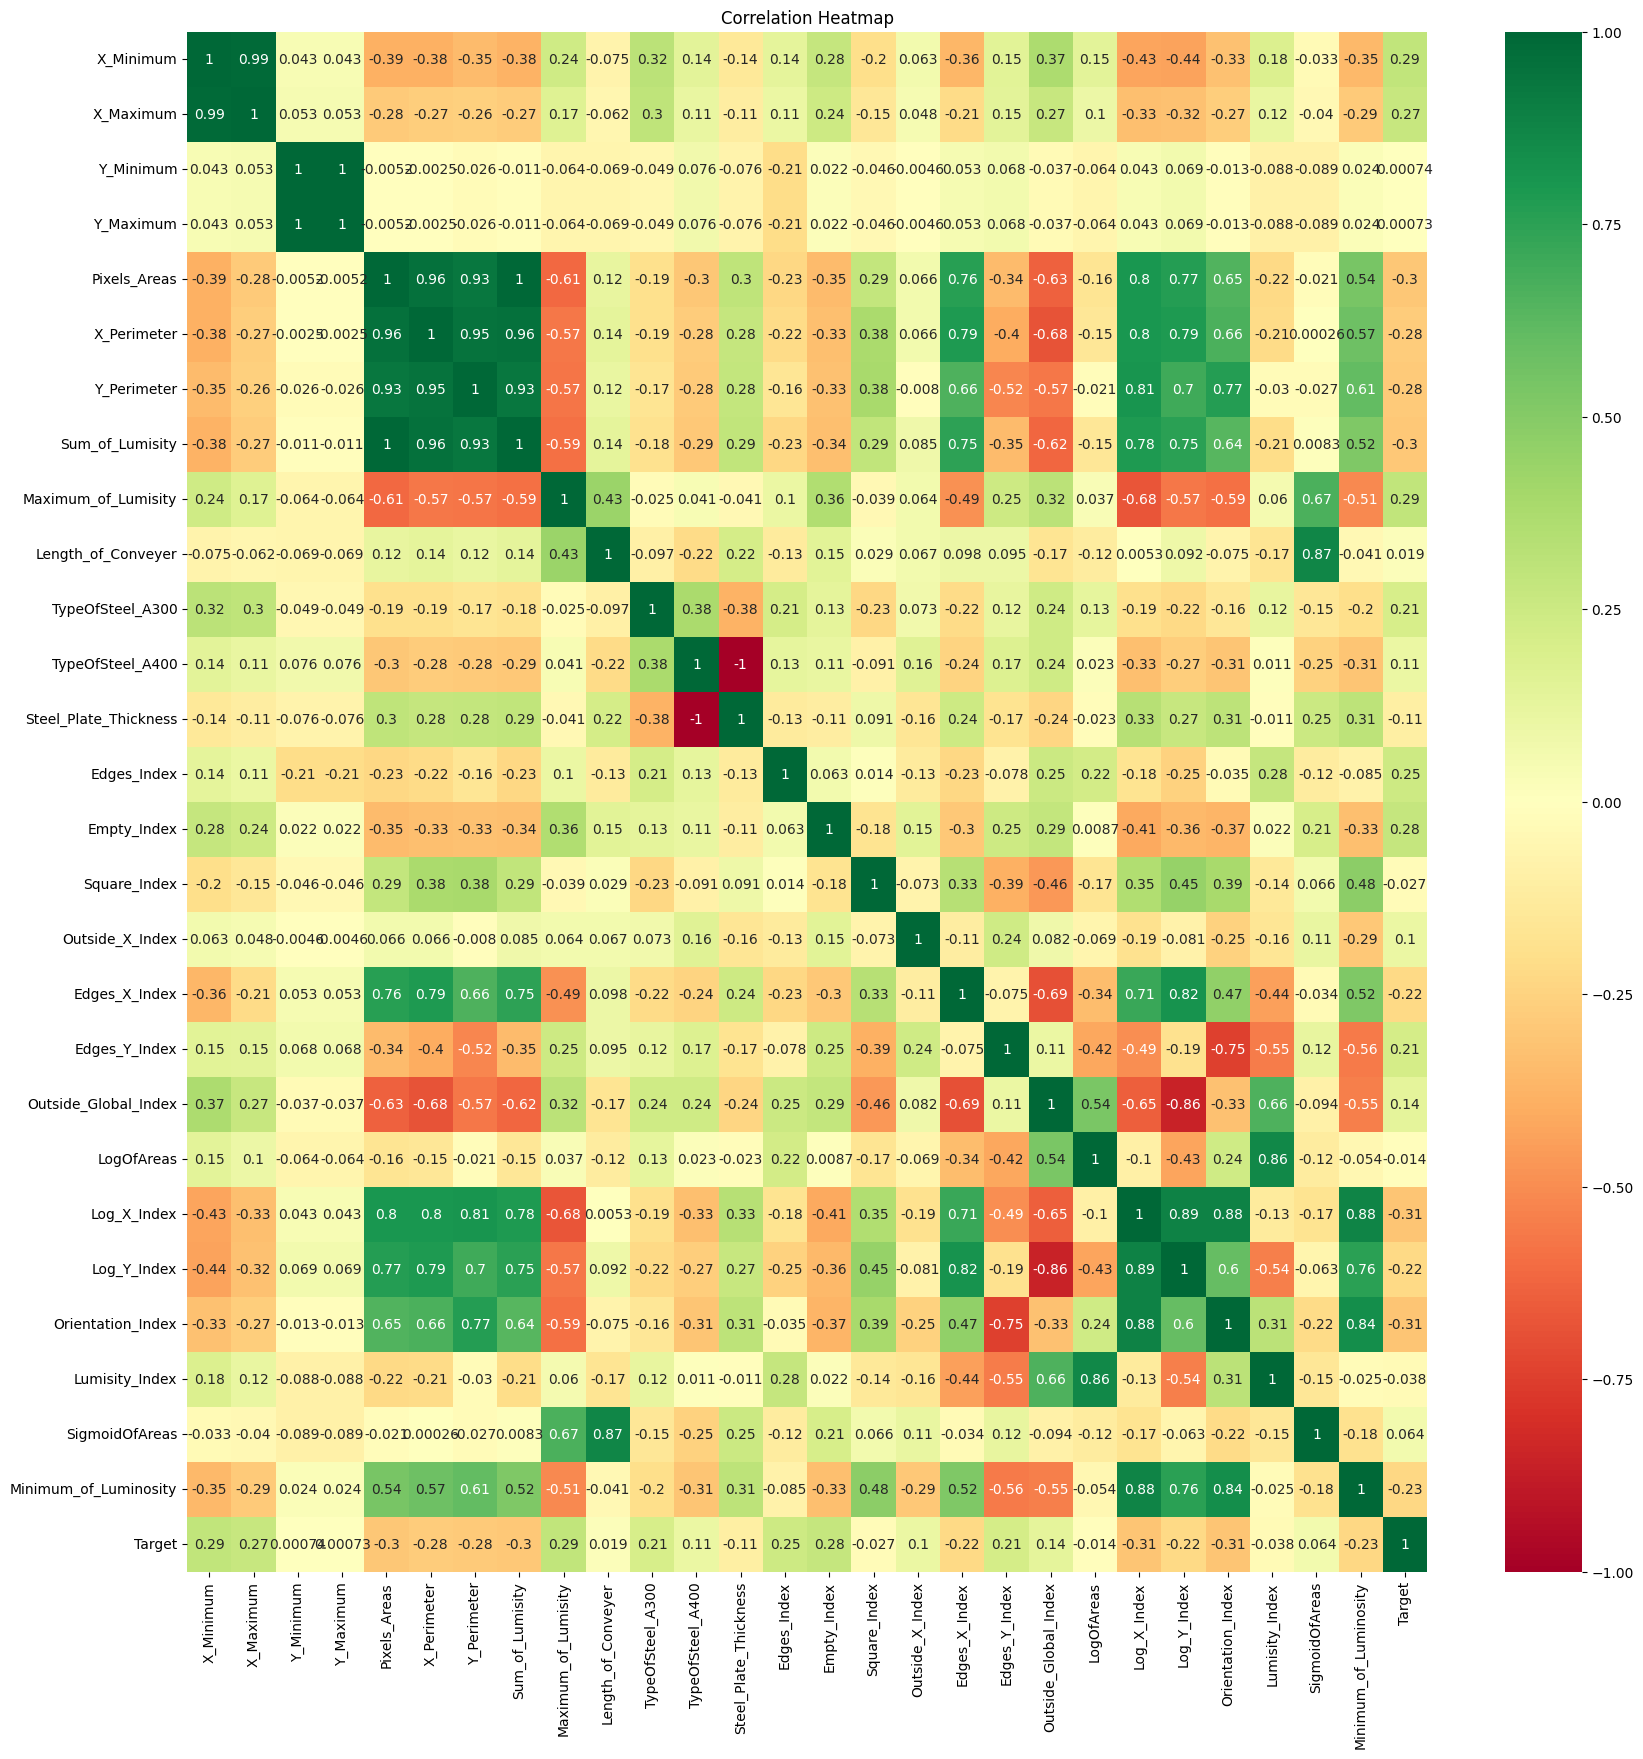

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

corr_mat = data.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr_mat, annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, r2_score, cohen_kappa_score, f1_score
from sklearn.manifold import TSNE

In [37]:
data_new = data.copy()

In [38]:
data_new.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Lumisity,Maximum_of_Lumisity,Length_of_Conveyer,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Lumisity_Index,SigmoidOfAreas,Minimum_of_Luminosity,Target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0


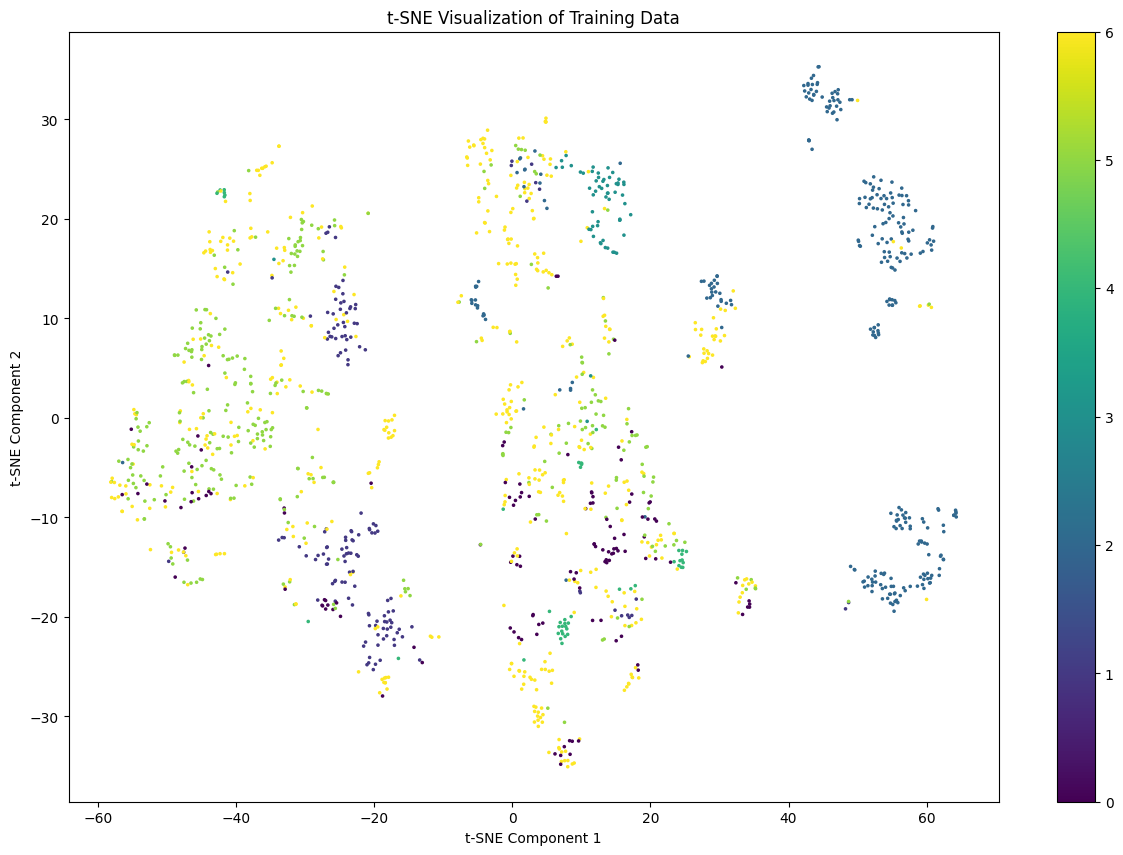

In [39]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = data_new.drop(columns=['Target'])
y = data_new['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply t-SNE
tsne = TSNE(random_state=123)
tsne_mat = tsne.fit_transform(X_train)

# Plot t-SNE result
plt.figure(figsize=(15,10))
plt.scatter(tsne_mat[:,0], tsne_mat[:,1], c=y_train.astype('int'), s=2.5, cmap='viridis')
plt.colorbar()
plt.title("t-SNE Visualization of Training Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


# We try to retain columns as much as we can so we only use PCA with those columns that have high multicollinearity

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting relevant columns
selected_columns = ['Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Lumisity', 'Target']

# Extracting data and target
X = data_new[selected_columns].drop(columns=['Target'])
y = data_new['Target']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=4)  # Specify the number of principal components to retain
X_pca = pca.fit_transform(X_scaled)

# Creating a DataFrame for PCA results
columns_pca = [f"PCA_{i+1}" for i in range(pca.n_components_)]
df_pca = pd.DataFrame(data=X_pca, columns=columns_pca)

# Concatenating PCA components with target
df_pca['Target'] = y.reset_index(drop=True)

# Explained variance ratio of the first principal component
explained_variance_ratio_pca1 = pca.explained_variance_ratio_[0]
print(f"Explained variance ratio of PCA1: {explained_variance_ratio_pca1:.2f}")

# Total explained variance by all selected principal components
total_explained_variance = pca.explained_variance_ratio_.sum()
print(f"Total explained variance by all components: {total_explained_variance:.2f}")


Explained variance ratio of PCA1: 0.97
Total explained variance by all components: 1.00


In [41]:
print(len(df_pca.iloc[:,0]))
print(len(data_new))

1940
1940


In [42]:
data_new.drop(columns=['Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Lumisity'], inplace=True)
data_new = pd.concat([data_new,df_pca.iloc[:,0]], axis=1)

In [43]:
data_new.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Maximum_of_Lumisity', 'Length_of_Conveyer', 'TypeOfSteel_A300',
       'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index',
       'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index',
       'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index',
       'Log_Y_Index', 'Orientation_Index', 'Lumisity_Index', 'SigmoidOfAreas',
       'Minimum_of_Luminosity', 'Target', 'PCA_1'],
      dtype='object')

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Assuming 'data_new' is your DataFrame and 'columns' contains your feature names
X = data_new.drop(columns=['Target'])
y = data_new['Target']
columns = X.columns

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize SelectKBest with the desired score function (e.g., f_classif for classification)
# Ensure that k is within the range of available columns
k_best = SelectKBest(score_func=f_classif, k=16)

# Fit SelectKBest to data
X_new = k_best.fit_transform(X, y)

# Get selected feature indices
selected_indices = k_best.get_support(indices=True)

# Print selected feature names
selected_features = [columns[i] for i in selected_indices]
print("Selected features:")
for i in selected_features:
  print(i)


Selected features:
X_Minimum
X_Maximum
Maximum_of_Lumisity
TypeOfSteel_A300
TypeOfSteel_A400
Steel_Plate_Thickness
Edges_Index
Empty_Index
Edges_X_Index
Outside_Global_Index
Log_X_Index
Log_Y_Index
Orientation_Index
Lumisity_Index
Minimum_of_Luminosity
PCA_1


In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = data_new.drop(columns=['Target'])
y = data_new['Target']
columns = X.columns

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Initialize RFE with estimator and number of features to select
estimator = LogisticRegression(max_iter=2000)
rfe = RFE(estimator, n_features_to_select=16, step=1)

# Fit RFE to data
X_rfe = rfe.fit_transform(X, y)

# Get selected feature indices
selected_indices_rfe = rfe.get_support(indices=True)

# Print selected feature names
selected_features_rfe = [columns[i] for i in selected_indices_rfe]
print("Selected features with RFE- Logistic Regression:")
for i in selected_features_rfe:
  print(i)

Selected features with RFE- Logistic Regression:
X_Minimum
Maximum_of_Lumisity
Length_of_Conveyer
TypeOfSteel_A300
TypeOfSteel_A400
Steel_Plate_Thickness
Edges_Index
Square_Index
Outside_X_Index
Edges_Y_Index
Outside_Global_Index
Log_X_Index
Log_Y_Index
Orientation_Index
Lumisity_Index
Minimum_of_Luminosity


In [46]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


# Initialize Random Forest classifier
rf_estimator = RandomForestClassifier(random_state=42)

# Initialize RFE with Random Forest as estimator and number of features to select
rfe_rf = RFE(estimator=rf_estimator, n_features_to_select=16, step=8)  # Select top 2 features

# Fit RFE with Random Forest to data
X_rfe_rf = rfe_rf.fit_transform(X, y)

# Get selected feature indices
selected_indices_rf = rfe_rf.get_support(indices=True)

# Print selected feature names
selected_features_rf = [columns[i] for i in selected_indices_rf]
print("Selected features with RFE- Random Forest:")
for i in selected_features_rf:
  print(i)

Selected features with RFE- Random Forest:
X_Minimum
X_Maximum
Y_Maximum
Maximum_of_Lumisity
TypeOfSteel_A300
Edges_Index
Empty_Index
Edges_X_Index
Outside_Global_Index
Log_X_Index
Log_Y_Index
Orientation_Index
Lumisity_Index
SigmoidOfAreas
Minimum_of_Luminosity
PCA_1


In [47]:
data_new.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Maximum_of_Lumisity', 'Length_of_Conveyer', 'TypeOfSteel_A300',
       'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index',
       'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index',
       'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index',
       'Log_Y_Index', 'Orientation_Index', 'Lumisity_Index', 'SigmoidOfAreas',
       'Minimum_of_Luminosity', 'Target', 'PCA_1'],
      dtype='object')

In [48]:
X, Y = data_new.drop(columns=['Target']), data.Target

In [49]:
Y.value_counts()

,count
Target,
6,673
5,402
2,390
1,190
0,158
3,72
4,55


In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=142)

# Oversampling is a solution but one other possibility is Random Forest or ensemble boosting methods which can handle imbalanced data very well.

# Trying to avoid SMOTE as SMOTE can lead to overfitting or introduction of noise.
# SMOTE stands for Synthetic Minority Oversampling Technique

In [51]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score

# Taking all 24 Features

In [52]:
# Features and target column names
columns = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Maximum_of_Lumisity', 'Length_of_Conveyer', 'TypeOfSteel_A300',
       'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index',
       'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index',
       'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index',
       'Log_Y_Index', 'Orientation_Index', 'Lumisity_Index', 'SigmoidOfAreas',
       'Minimum_of_Luminosity', 'PCA_1']

target = 'Target'

# Split data into features and target
X = data_new[columns]
y = data_new[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Weighted F1 Score', 'Accuracy',  'Cohen Kappa'])

# Train and evaluate each model using pipelines
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])


    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results = pd.concat([results, pd.DataFrame({'Model': [name], 'Weighted F1 Score': [weighted_f1], 'Accuracy': [accuracy], 'Cohen Kappa': [cohen_kappa]})], ignore_index=True)

# Print results
print(results)


<ipython-input-52-b26c4943ab5d>:52: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:36:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




                 Model  Weighted F1 Score  Accuracy  Cohen Kappa
0  Logistic Regression           0.737189  0.737113     0.660000
1  K-Nearest Neighbors           0.725922  0.729381     0.654010
2          Naive Bayes           0.643598  0.649485     0.571455
3        Decision Tree           0.767098  0.765464     0.697330
4        Random Forest           0.775987  0.778351     0.706683
5             AdaBoost           0.446585  0.561856     0.343799
6              XGBoost           0.784291  0.783505     0.718610
7    Gradient Boosting           0.795479  0.793814     0.730824
8                  SVM           0.752893  0.752577     0.676366


# Taking Features as per Correlation coefficient table output
## Taking 14 best features (inclusive of PCA_1)

In [53]:
# Features and target column names
columns = ["Edges_Index","Edges_X_Index","Edges_Y_Index","Empty_Index","Lumisity_Index",
"Maximum_of_Lumisity","Minimum_of_Luminosity","Orientation_Index","Outside_Global_Index",
"Outside_X_Index","PCA_1","TypeOfSteel_A300","TypeOfSteel_A400","X_Minimum"]

target = 'Target'

# Split data into features and target
X = data_new[columns]
y = data_new[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Weighted F1 Score', 'Accuracy',  'Cohen Kappa'])

# Train and evaluate each model using pipelines
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])


    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results = pd.concat([results, pd.DataFrame({'Model': [name], 'Weighted F1 Score': [weighted_f1], 'Accuracy': [accuracy], 'Cohen Kappa': [cohen_kappa]})], ignore_index=True)

# Print results
print(results)

<ipython-input-53-8076c813d073>:48: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:36:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




                 Model  Weighted F1 Score  Accuracy  Cohen Kappa
0  Logistic Regression           0.725383  0.726804     0.644255
1  K-Nearest Neighbors           0.693486  0.693299     0.611219
2          Naive Bayes           0.604158  0.613402     0.530118
3        Decision Tree           0.735526  0.734536     0.660066
4        Random Forest           0.775071  0.773196     0.702871
5             AdaBoost           0.438842  0.533505     0.321324
6              XGBoost           0.776316  0.775773     0.707920
7    Gradient Boosting           0.777207  0.775773     0.707413
8                  SVM           0.729062  0.729381     0.646734


# Taking features as per K-Best
## Taking best 16 features

In [54]:
# Features and target column names
columns = ['X_Minimum', 'X_Maximum', 'Maximum_of_Lumisity', 'TypeOfSteel_A300',
       'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index',
       'Empty_Index', 'Edges_X_Index', 'Outside_Global_Index', 'Log_X_Index',
       'Log_Y_Index', 'Orientation_Index', 'Lumisity_Index',
       'Minimum_of_Luminosity', 'PCA_1']

target = 'Target'

# Split data into features and target
X = data_new[columns]
y = data_new[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Weighted F1 Score', 'Accuracy',  'Cohen Kappa'])

# Train and evaluate each model using pipelines
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])


    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results = pd.concat([results, pd.DataFrame({'Model': [name], 'Weighted F1 Score': [weighted_f1], 'Accuracy': [accuracy], 'Cohen Kappa': [cohen_kappa]})], ignore_index=True)

# Print results
print(results)

<ipython-input-54-ba0453cdc7bd>:50: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:36:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




                 Model  Weighted F1 Score  Accuracy  Cohen Kappa
0  Logistic Regression           0.685251  0.685567     0.589204
1  K-Nearest Neighbors           0.705864  0.706186     0.625314
2          Naive Bayes           0.610569  0.610825     0.530391
3        Decision Tree           0.711295  0.706186     0.622033
4        Random Forest           0.789554  0.788660     0.721723
5             AdaBoost           0.449878  0.515464     0.330697
6              XGBoost           0.794463  0.793814     0.731648
7    Gradient Boosting           0.784233  0.783505     0.715724
8                  SVM           0.710541  0.719072     0.629875


# Taking features as per Recurrsive feature selection using Random Forest

In [55]:
# Features and target column names
columns = ["X_Minimum", "X_Maximum", "Y_Maximum", "Maximum_of_Lumisity", "TypeOfSteel_A300", "Edges_Index",
"Empty_Index", "Edges_X_Index", "Outside_Global_Index", "Log_X_Index", "Log_Y_Index",
"Orientation_Index", "Lumisity_Index", "SigmoidOfAreas", "Minimum_of_Luminosity", "PCA_1"]

target = 'Target'

# Split data into features and target
X = data_new[columns]
y = data_new[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Weighted F1 Score', 'Accuracy',  'Cohen Kappa'])

# Train and evaluate each model using pipelines
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])


    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results = pd.concat([results, pd.DataFrame({'Model': [name], 'Weighted F1 Score': [weighted_f1], 'Accuracy': [accuracy], 'Cohen Kappa': [cohen_kappa]})], ignore_index=True)

# Print results
print(results)


<ipython-input-55-09abb5b5aa1c>:48: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:36:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




                 Model  Weighted F1 Score  Accuracy  Cohen Kappa
0  Logistic Regression           0.685062  0.685567     0.589589
1  K-Nearest Neighbors           0.714835  0.716495     0.638287
2          Naive Bayes           0.604259  0.610825     0.527638
3        Decision Tree           0.733096  0.729381     0.651279
4        Random Forest           0.774636  0.773196     0.703668
5             AdaBoost           0.464138  0.518041     0.339758
6              XGBoost           0.792045  0.791237     0.727797
7    Gradient Boosting           0.789606  0.788660     0.723951
8                  SVM           0.716010  0.713918     0.628490


# Finalizing features

In [56]:
# Features and target column names
columns = ["Edges_Index", "Edges_X_Index", "Empty_Index", "Log_X_Index", "Lumisity_Index",
"Maximum_of_Lumisity", "Minimum_of_Luminosity", "Orientation_Index", "Outside_Global_Index",
"Outside_X_Index", "PCA_1", "TypeOfSteel_A300", "TypeOfSteel_A400", "X_Minimum", "SigmoidOfAreas"]

target = 'Target'

# Split data into features and target
X = data_new[columns]
y = data_new[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Weighted F1 Score', 'Accuracy',  'Cohen Kappa'])

# Train and evaluate each model using pipelines
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results = pd.concat([results, pd.DataFrame({'Model': [name], 'Weighted F1 Score': [weighted_f1], 'Accuracy': [accuracy], 'Cohen Kappa': [cohen_kappa]})], ignore_index=True)

# Print results
print(results)

<ipython-input-56-93dc76c53259>:47: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[17:36:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




                 Model  Weighted F1 Score  Accuracy  Cohen Kappa
0  Logistic Regression           0.736567  0.737113     0.658283
1  K-Nearest Neighbors           0.710798  0.711340     0.632899
2          Naive Bayes           0.625654  0.631443     0.549434
3        Decision Tree           0.733750  0.729381     0.651866
4        Random Forest           0.782514  0.780928     0.711001
5             AdaBoost           0.450492  0.546392     0.331427
6              XGBoost           0.786726  0.786082     0.722501
7    Gradient Boosting           0.798077  0.796392     0.734888
8                  SVM           0.734988  0.737113     0.655992


In [74]:
!pip install optuna
import optuna
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler


# Assuming 'data_new' is your DataFrame with features and target
X = data_new.drop(columns=['Target'])
y = data_new['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the objective function for XGBoost
def objective_xgb(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1)
    }

    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Define the objective function for Gradient Boosting
def objective_gbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }

    model = GradientBoostingClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Optimize for XGBoost
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

# Optimize for Gradient Boosting
study_gbm = optuna.create_study(direction='maximize')
study_gbm.optimize(objective_gbm, n_trials=50)

# Print model names and best hyperparameters
print("Model: XGBoost")
print("Best Hyperparameters: ", study_xgb.best_params)
print("\nModel: Gradient Boosting")
print("Best Hyperparameters: ", study_gbm.best_params)


[I 2024-08-10 17:53:42,293] A new study created in memory with name: no-name-99899f38-c3c7-4ccb-86d7-87f02c28913d
[I 2024-08-10 17:53:42,904] Trial 0 finished with value: 0.7783505154639175 and parameters: {'n_estimators': 138, 'max_depth': 8, 'learning_rate': 0.08733844080313641, 'gamma': 1.4972219409759358, 'min_child_weight': 7, 'subsample': 0.9517294816636312, 'colsample_bytree': 0.9680030176433883}. Best is trial 0 with value: 0.7783505154639175.
[I 2024-08-10 17:53:46,162] Trial 1 finished with value: 0.8015463917525774 and parameters: {'n_estimators': 80, 'max_depth': 9, 'learning_rate': 0.13228528402468773, 'gamma': 0.24039273895404667, 'min_child_weight': 2, 'subsample': 0.9239919976277056, 'colsample_bytree': 0.5205473132378202}. Best is trial 1 with value: 0.8015463917525774.
[I 2024-08-10 17:53:46,454] Trial 2 finished with value: 0.7525773195876289 and parameters: {'n_estimators': 58, 'max_depth': 10, 'learning_rate': 0.13113529386707115, 'gamma': 1.1987107683920195, 'min_

Model: XGBoost
Best Hyperparameters:  {'n_estimators': 124, 'max_depth': 10, 'learning_rate': 0.2707064868370964, 'gamma': 0.9891720276507118, 'min_child_weight': 2, 'subsample': 0.9072610943478958, 'colsample_bytree': 0.8189612680971006}

Model: Gradient Boosting
Best Hyperparameters:  {'n_estimators': 297, 'max_depth': 4, 'learning_rate': 0.0980813107733551, 'min_samples_split': 2, 'min_samples_leaf': 20, 'subsample': 0.5010383302803355, 'max_features': 'sqrt'}


In [75]:
print("Model: XGBoost")
print("Best Hyperparameters: ", study_xgb.best_params)
print("\nModel: Gradient Boosting")
print("Best Hyperparameters: ", study_gbm.best_params)

Model: XGBoost
Best Hyperparameters:  {'n_estimators': 124, 'max_depth': 10, 'learning_rate': 0.2707064868370964, 'gamma': 0.9891720276507118, 'min_child_weight': 2, 'subsample': 0.9072610943478958, 'colsample_bytree': 0.8189612680971006}

Model: Gradient Boosting
Best Hyperparameters:  {'n_estimators': 297, 'max_depth': 4, 'learning_rate': 0.0980813107733551, 'min_samples_split': 2, 'min_samples_leaf': 20, 'subsample': 0.5010383302803355, 'max_features': 'sqrt'}


In [77]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

columns = ["Edges_Index", "Edges_X_Index", "Empty_Index", "Log_X_Index", "Lumisity_Index",
"Maximum_of_Lumisity", "Minimum_of_Luminosity", "Orientation_Index", "Outside_Global_Index",
"Outside_X_Index", "PCA_1", "TypeOfSteel_A300", "TypeOfSteel_A400", "X_Minimum", "SigmoidOfAreas"]

target = 'Target'

# Split data into features and target
X = data_new[columns]
y = data_new[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost with specified hyperparameters
xgb_params = {
    'n_estimators': 124,
    'max_depth': 10,
    'learning_rate': 0.2707064868370964,
    'gamma': 0.9891720276507118,
    'min_child_weight': 2,
    'subsample': 0.9072610943478958,
    'colsample_bytree': 0.8189612680971006,
    'use_label_encoder': False,
    'eval_metric': 'logloss'
}

xgb_model = xgb.XGBClassifier(**xgb_params)

# Define Gradient Boosting with specified hyperparameters
gbm_params = {
    'n_estimators': 297,
    'max_depth': 4,
    'learning_rate': 0.0980813107733551,
    'min_samples_split': 2,
    'min_samples_leaf': 20,
    'subsample': 0.5010383302803355,
    'max_features': "sqrt"
}

gbm_model = GradientBoostingClassifier(**gbm_params)

# List of models to train and evaluate
models = {
    'XGBoost': xgb_model,
    'Gradient Boosting': gbm_model
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Weighted F1 Score', 'Accuracy',  'Cohen Kappa'])

# Train and evaluate each model using pipelines
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])


    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results = pd.concat([results, pd.DataFrame({'Model': [name], 'Weighted F1 Score': [weighted_f1], 'Accuracy': [accuracy], 'Cohen Kappa': [cohen_kappa]})], ignore_index=True)

# Print results
print(results)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[18:32:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


<ipython-input-77-ec2906ea3236>:72: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



               Model  Weighted F1 Score  Accuracy  Cohen Kappa
0            XGBoost           0.791039  0.791237     0.727015
1  Gradient Boosting           0.781569  0.778351     0.712010


# Deployment

In [60]:
! pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [61]:
import streamlit as st

In [78]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define columns used for training and prediction
columns = ["Edges_Index", "Edges_X_Index", "Empty_Index", "Log_X_Index", "Lumisity_Index",
           "Maximum_of_Lumisity", "Minimum_of_Luminosity", "Orientation_Index", "Outside_Global_Index",
           "Outside_X_Index", "PCA_1", "TypeOfSteel_A300", "TypeOfSteel_A400", "X_Minimum", "SigmoidOfAreas"]
target = 'Target'


# Split data into features and target
X = data_new[columns]
y = data_new[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost with specified hyperparameters
xgb_params = {
    'n_estimators': 297,
    'max_depth': 4,
    'learning_rate': 0.0980813107733551,
    'min_samples_split': 2,
    'min_samples_leaf': 20,
    'subsample': 0.5010383302803355,
    'max_features': "sqrt"
}

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(**xgb_params))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline and scaler
joblib.dump(pipeline, 'XGBClassifier2.pkl')
joblib.dump(pipeline.named_steps['scaler'], 'scaler.pkl')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[18:34:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.




['scaler.pkl']

In [63]:
! pip install streamlit -q
!wget -q -O - ipv4.icanhazip.com

35.204.230.118


In [64]:
# def classify_fault (["Edges_Index", "Edges_X_Index", "Empty_Index", "Log_X_Index", "Lumisity_Index",
#                      "Maximum_of_Lumisity", "Minimum_of_Luminosity", "Orientation_Index", "Outside_Global_Index",
#                      "Outside_X_Index", "PCA_1", "TypeOfSteel_A300", "TypeOfSteel_A400", "X_Minimum", "SigmoidOfAreas"]):
#   XGB = joblib.load('XGBClassifier2.pkl')
#   scaler = joblib.load('scaler.pkl')

#   input_data = pd.DataFrame({
#     'Edges_Index': [Edges_Index],
#     'Edges_X_Index': [Edges_X_Index],
#     'Empty_Index': [Empty_Index],
#     'Log_X_Index': [Log_X_Index],
#     'Lumisity_Index': [Lumisity_Index],
#     'Maximum_of_Lumisity': [Maximum_of_Lumisity],
#     'Minimum_of_Luminosity': [Minimum_of_Luminosity],
#     'Orientation_Index': [Orientation_Index],
#     'Outside_Global_Index': [Outside_Global_Index],
#     'Outside_X_Index': [Outside_X_Index],
#     'PCA_1': [PCA_1],
#     'TypeOfSteel_A300': [TypeOfSteel_A300],
#     'TypeOfSteel_A400': [TypeOfSteel_A400],
#     'X_Minimum': [X_Minimum],
#     'SigmoidOfAreas': [SigmoidOfAreas] })

#   prediction = XGB.predict(scaled_data)[0]
#   # Map predictions to meaningful classes
#   fault_mapping = {
#     0: 'Pastry',
#     1: 'Z_Scratch',
#     2: 'K_Scratch',
#     3: 'Stains',
#     4: 'Dirtiness',
#     5: 'Bumps',
#     6: 'Other_Faults'}

#     prediction_label = fault_mapping.get(prediction, 'Unknown')
#     return prediction_label

In [65]:
# def main:
#   st.title("Steel Plate fault classifier")
#   html_temp = """
#   <div style = "background-color:tomato;padding:10px">
#   <h2 style = "color:white;text-align:center;">Streamlit Steel Plate fault classifier ML App </h2>
#   <div>
#   """

#   st.markdown(html_temp,unsafe_allow_html=True)
#   nEdges_Index = st.number_input('Edges_Index', min_value=40.0, max_value=300.0, step=0.1)
#   nEdges_X_Index = st.number_input('Edges_X_Index', min_value=0.0015, max_value=0.8759, step=0.0001)
#   nEmpty_Index = st.number_input('Empty_Index', min_value=0.0, max_value=0.9952, step=0.0001)
#   nLog_X_Index = st.number_input('Log_X_Index', min_value=0.301, max_value=4.5721, step=0.1)
#   nLumisity_Index = st.number_input('Lumisity_Index', min_value=-0.991, max_value=0.9607, step=0.1)
#   nMaximum_of_Lumisity = st.number_input('Maximum_of_Lumisity', min_value=0.0, max_value=203.0, step=0.1)
#   nMinimum_of_Luminosity = st.number_input('Minimum_of_Luminosity', min_value=0.119, max_value=1.0, step=0.001)
#   nOrientation_Index = st.number_input('Orientation_Index', min_value=0.0, max_value=2.776, step=0.1)
#   nOutside_Global_Index = st.number_input('Outside_Global_Index', min_value=0.0484, max_value=1.0, step=0.0001)
#   nOutside_X_Index = st.number_input('Outside_X_Index', min_value=0.009, max_value=1.0, step=0.0001)
#   nPixels_Areas = st.number_input('Pixels_Areas', min_value=2.0, max_value=37334.0, step=1.0)
#   nX_Perimeter = st.number_input('X_Perimeter', min_value=2.0, max_value=1275.0, step=1.0)
#   nY_Perimeter = st.number_input('Y_Perimeter', min_value=1.0, max_value=903.0, step=1.0)
#   nSum_of_Lumisity = st.number_input('Sum_of_Lumisity', min_value=250.0, max_value=3918209.0, step=1000.0)
#   nTypeOfSteel_A300 = st.number_input('TypeOfSteel_A300', min_value=1227.0, max_value=1794.0, step=1.0)
#   nTypeOfSteel_A400 = st.selectbox('TypeOfSteel_A400', [0, 1])
#   nX_Minimum = st.number_input('X_Minimum', min_value=0.0, max_value=1705.0, step=1.0)
#   nSigmoidOfAreas = st.number_input('SigmoidOfAreas', min_value=-0.9989, max_value=0.6421, step=0.001)
#   # Calculate PCA_1
#   PCA_1 = 0.50 * nPixels_Areas + 0.50 * nX_Perimeter + 0.49 * nY_Perimeter + 0.50 * nSum_of_Lumisity
#   result = ""
#   if st.button("Predict"):
#     result = classify_fault(["Edges_Index", "Edges_X_Index", "Empty_Index", "Log_X_Index", "Lumisity_Index",
#                              "Maximum_of_Lumisity", "Minimum_of_Luminosity", "Orientation_Index", "Outside_Global_Index",
#                              "Outside_X_Index", "PCA_1", "TypeOfSteel_A300", "TypeOfSteel_A400", "X_Minimum", "SigmoidOfAreas"])
#     st.success("The Fault type is {result}")

# if __name__ == '__main__':
#   main()

In [66]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib

def classify_fault(Edges_Index, Edges_X_Index, Empty_Index, Log_X_Index, Lumisity_Index,
                   Maximum_of_Lumisity, Minimum_of_Luminosity, Orientation_Index, Outside_Global_Index,
                   Outside_X_Index, PCA_1, TypeOfSteel_A300, TypeOfSteel_A400, X_Minimum, SigmoidOfAreas):
    XGB = joblib.load('XGBClassifier2.pkl')

    input_data = pd.DataFrame({
        'Edges_Index': [Edges_Index],
        'Edges_X_Index': [Edges_X_Index],
        'Empty_Index': [Empty_Index],
        'Log_X_Index': [Log_X_Index],
        'Lumisity_Index': [Lumisity_Index],
        'Maximum_of_Lumisity': [Maximum_of_Lumisity],
        'Minimum_of_Luminosity': [Minimum_of_Luminosity],
        'Orientation_Index': [Orientation_Index],
        'Outside_Global_Index': [Outside_Global_Index],
        'Outside_X_Index': [Outside_X_Index],
        'PCA_1': [PCA_1],
        'TypeOfSteel_A300': [TypeOfSteel_A300],
        'TypeOfSteel_A400': [TypeOfSteel_A400],
        'X_Minimum': [X_Minimum],
        'SigmoidOfAreas': [SigmoidOfAreas] })

    prediction = XGB.predict(input_data)[0]

    fault_mapping = {
        0: 'Pastry',
        1: 'Z_Scratch',
        2: 'K_Scratch',
        3: 'Stains',
        4: 'Dirtiness',
        5: 'Bumps',
        6: 'Other_Faults'}

    prediction_label = fault_mapping.get(prediction, 'Unknown')
    return prediction_label

def main():
    st.title("Steel Plate Fault Classifier")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit Steel Plate Fault Classifier ML App</h2>
    </div>
    """
    st.markdown(html_temp, unsafe_allow_html=True)

    nEdges_Index = st.number_input('Edges_Index', min_value=40.0, max_value=300.0, step=0.1)
    nEdges_X_Index = st.number_input('Edges_X_Index', min_value=0.0015, max_value=0.8759, step=0.0001)
    nEmpty_Index = st.number_input('Empty_Index', min_value=0.0, max_value=0.9952, step=0.0001)
    nLog_X_Index = st.number_input('Log_X_Index', min_value=0.301, max_value=4.5721, step=0.1)
    nLumisity_Index = st.number_input('Lumisity_Index', min_value=-0.991, max_value=0.9607, step=0.1)
    nMaximum_of_Lumisity = st.number_input('Maximum_of_Lumisity', min_value=0.0, max_value=203.0, step=0.1)
    nMinimum_of_Luminosity = st.number_input('Minimum_of_Luminosity', min_value=0.119, max_value=1.0, step=0.001)
    nOrientation_Index = st.number_input('Orientation_Index', min_value=0.0, max_value=2.776, step=0.1)
    nOutside_Global_Index = st.number_input('Outside_Global_Index', min_value=0.0484, max_value=1.0, step=0.0001)
    nOutside_X_Index = st.number_input('Outside_X_Index', min_value=0.009, max_value=1.0, step=0.0001)
    nPixels_Areas = st.number_input('Pixels_Areas', min_value=2.0, max_value=37334.0, step=1.0)
    nX_Perimeter = st.number_input('X_Perimeter', min_value=2.0, max_value=1275.0, step=1.0)
    nY_Perimeter = st.number_input('Y_Perimeter', min_value=1.0, max_value=903.0, step=1.0)
    nSum_of_Lumisity = st.number_input('Sum_of_Lumisity', min_value=250.0, max_value=3918209.0, step=1000.0)
    nTypeOfSteel_A300 = st.number_input('TypeOfSteel_A300', min_value=1227.0, max_value=1794.0, step=1.0)
    nTypeOfSteel_A400 = st.selectbox('TypeOfSteel_A400', [0, 1])
    nX_Minimum = st.number_input('X_Minimum', min_value=0.0, max_value=1705.0, step=1.0)
    nSigmoidOfAreas = st.number_input('SigmoidOfAreas', min_value=-0.9989, max_value=0.6421, step=0.001)

    PCA_1 = 0.50 * nPixels_Areas + 0.50 * nX_Perimeter + 0.49 * nY_Perimeter + 0.50 * nSum_of_Lumisity

    result = ""
    if st.button("Predict"):
        result = classify_fault(nEdges_Index, nEdges_X_Index, nEmpty_Index, nLog_X_Index, nLumisity_Index,
                                nMaximum_of_Lumisity, nMinimum_of_Luminosity, nOrientation_Index, nOutside_Global_Index,
                                nOutside_X_Index, PCA_1, nTypeOfSteel_A300, nTypeOfSteel_A400, nX_Minimum, nSigmoidOfAreas)
        st.success(f"The Fault type is {result}")

if __name__ == '__main__':
    main()


Writing app.py


In [69]:
!streamlit run app.py & npx localtunnel --port 8501





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.204.230.118:8501

your url is: https://kind-facts-search.loca.lt
  Stopping...
^C


In [70]:
data[['Edges_Index', 'Edges_X_Index', 'Empty_Index', 'Log_X_Index', 'Lumisity_Index',
                   'Maximum_of_Lumisity', 'Minimum_of_Luminosity', 'Orientation_Index', 'Outside_Global_Index',
                   'Outside_X_Index', 'Pixels_Areas', 'X_Perimeter','Y_Perimeter', 'Sum_of_Lumisity', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'X_Minimum', 'SigmoidOfAreas']].head()

,Edges_Index,Edges_X_Index,Empty_Index,Log_X_Index,Lumisity_Index,Maximum_of_Lumisity,Minimum_of_Luminosity,Orientation_Index,Outside_Global_Index,Outside_X_Index,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Lumisity,TypeOfSteel_A300,TypeOfSteel_A400,X_Minimum,SigmoidOfAreas
0,80,0.0047,0.0498,2.4265,0.8182,76,0.5822,1.6435,1.0000,0.1818,267,17,44,24220,1687,1,42,-0.2913
1,80,0.0036,0.7647,2.0334,0.7931,84,0.2984,1.4624,0.9667,0.2069,108,10,30,11397,1687,1,645,-0.1756
2,100,0.0037,0.9710,1.8513,0.6667,99,0.2150,1.2553,0.9474,0.3333,71,8,19,7972,1623,1,829,-0.1228
3,290,0.0052,0.7287,2.2455,0.8444,99,0.5212,1.6532,1.0000,0.1556,176,13,45,18996,1353,0,853,-0.1568
4,185,0.0126,0.0695,3.3818,0.9338,37,1.0000,2.4099,0.9885,0.0662,2409,60,260,246930,1353,0,1289,-0.1992


# -----------------------------------------------------------
# -----------------------------------------------------------
